<a href="https://colab.research.google.com/github/wangjalen7/project_voting/blob/main/Project_Voting_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Voting Project***

## **Summary**

## **Data**

The support vector machine regression model used the same preprocessing process and features as the random forest model. However, by the nature of support vector machines, additional preprocessing steps were required. The first additional step was to standardize the values using the equation $X_{i} =
\frac{X_i - min}{max - min}$. The second additional step was simply to fill all null values with $0$.

In [ ]:
county_adjacencies_data_path = "./data/county_adjacencies.csv"
county_adj_data = pd.read_csv(county_adjacencies_data_path)
county_adj_data.head()

,County,Population2022,FIPS,District,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,Accomack,33191,51001,2,Northumberland,Lancaster,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albemarle,114534,51003,5,CharlottesvilleCity,Nelson,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,AlexandriaCity,155525,51510,8,Fairfax,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alleghany,14835,51005,6,Craig,Bath,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amelia,13455,51007,5,PrinceEdward,Cumberland,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
voting_va.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,net_votes
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL,-5092
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,6352
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL,-220
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL,-261
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL,-16255


In [ ]:
rep_primary.head()

,CandidateId,CandidateName,total_votes,Party,WriteInVote,LocalityCode,county_name,PrecinctId,PrecinctName,DistrictId,DistrictType,DistrictName,OfficeId,OfficeTitle,ElectionId,ElectionType,ElectionDate,ElectionName,NumberOfSeats
0,cs4,Chris Christie,1,Republican,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed1,state,United States Of America,cc2,President,NaN,Primary,2024-03-05,2024 March Republican Primary,1
1,cs7,Donald J. Trump,330,Republican,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed1,state,United States Of America,cc2,President,NaN,Primary,2024-03-05,2024 March Republican Primary,1
2,cs9,Nikki R. Haley,77,Republican,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed1,state,United States Of America,cc2,President,NaN,Primary,2024-03-05,2024 March Republican Primary,1
3,cs8,Ron D. DeSantis,6,Republican,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed1,state,United States Of America,cc2,President,NaN,Primary,2024-03-05,2024 March Republican Primary,1
4,cs5,Ryan L. Binkley,0,Republican,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed1,state,United States Of America,cc2,President,NaN,Primary,2024-03-05,2024 March Republican Primary,1


In [ ]:
X_train.shape

(622, 168)

In [ ]:
y_train.shape

(622,)

In [ ]:
y_train.head()

694    9.611262
638    6.679601
133    8.071531
355    8.005033
55     8.022241
Name: net_votes_ihs, dtype: float64

In [ ]:
X_train_std = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_train_std = X_train_std.fillna(0)

X_test_std = (X_test - X_test.min()) / (X_test.max() - X_test.min())
X_test_std = X_test_std.fillna(0)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# kernels
kernels = ["linear", "poly", "rbf", "sigmoid"]


# create a svm regressor machine
svm_regr_model = SVR(kernel = "linear", C = 1.0, epsilon = .02)

svm_regr_model.fit(X_train_std, y_train)

SVR(epsilon=0.02, kernel='linear')

## **Results**

Another approach we considered was to support vector machines due to its simplicity and reliability. The model was trained with the same data for the random forest regression technique; however, a few minor changes were needed. The data was standardized to have values between $0$ and $1$ and null values were replaced with $0$. Afterwards, the SVM was finetuned with various hyperparameters such as $C$, $\gamma$, and $kernel$.

In [ ]:
from sklearn.model_selection import GridSearchCV

# fine-tune the model
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, .1, .01, .001, .0001],
    "kernel": kernels
}

grid = GridSearchCV(svm_regr_model, param_grid, refit = True, verbose = 3)
grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.394 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.271 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.336 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.201 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.314 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.351 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.224 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.299 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.151 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=1, kernel=poly;, score=-0.273 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.406 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVR(epsilon=0.02, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=100, epsilon=0.02, gamma=1)


The SVM that yielded the best score happened to have $C = 100$, $\gamma = 1$, and the $rbf$ kernel. This particular SVM yields an $R^2$ score of $74$%. This means that the SVM can explain approximately $74$% of the variance in the net vote counts across counties. Although this is a decent score for the SVM, I think the SVM has the capacity to account for the complexity of this particular project. Interestingly, the model predicts that the Democrats will win the vote for this upcoming election despite using the same features as the random forest regressor. However, just like the random forest, this result should be approached with caution because although the SVM has the capacity to account for some complexity of this particular project, it can not possibly cover everything. Elections by nature are very difficult to predict.

In [ ]:
svr_r2_score = grid.score(X_test_std, y_test)

In [ ]:
print("R^2 score for SVM regressor:", svr_r2_score)

R^2 score for SVM regressor: 0.7403190159715507


In [ ]:
svm_predictions = np.sinh(grid.predict(X_2024))

In [ ]:
svm_total_predictions = svm_predictions.sum()
print("SVM total prediction:", svm_total_predictions)

SVM total prediction: -22.520350223733494


## **Conclusion**

## **Appendix**

# Jalen's Model

## Data Cleaning and Visualization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load datasets
voting_va = pd.read_csv('./data/voting_VA.csv')
voting_data = pd.read_csv("./data/voting_VA.csv")
dem_primary = pd.read_csv('./data/2024 March Democratic Primary Election Results.csv')
rep_primary = pd.read_csv('./data/2024 March Republican Primary Election Results.csv')


In [ ]:
# Dropping irrelevant columns
voting_data_clean = voting_data.drop(columns=['Unnamed: 0', 'state', 'state_po', 'office', 'version', 'mode'])

# Check for missing values
missing_values = voting_data_clean.isnull().sum()

# Calculating net vote counts per county per election year
# Filter to keep only Republican and Democrat votes for simplicity in calculating net vote count
voting_data_filtered = voting_data_clean[voting_data_clean['party'].isin(['REPUBLICAN', 'DEMOCRAT'])]

# Pivot table to reshape the data
pivot_data = voting_data_filtered.pivot_table(index=['year', 'county_name', 'county_fips', 'totalvotes'],
                                              columns='party', values='candidatevotes', aggfunc='sum').reset_index()

# Calculate net vote count (Republican - Democrat)
pivot_data['net_vote_count'] = pivot_data['REPUBLICAN'] - pivot_data['DEMOCRAT']

pivot_data.head(), missing_values


(party  year county_name  county_fips  totalvotes  DEMOCRAT  REPUBLICAN  \
 0      2000    ACCOMACK        51001       11925      5092        6352   
 1      2000   ALBEMARLE        51003       36846     16255       18291   
 2      2000  ALEXANDRIA        51510       55199     33633       19043   
 3      2000   ALLEGHANY        51005        5123      2214        2808   
 4      2000      AMELIA        51007        4788      1754        2947   
 
 party  net_vote_count  
 0                1260  
 1                2036  
 2              -14590  
 3                 594  
 4                1193  ,
 year              0
 county_name       0
 county_fips       0
 candidate         0
 party             0
 candidatevotes    0
 totalvotes        0
 dtype: int64)

In [ ]:
# Standardize column names
dem_primary.rename(columns={'LocalityName': 'county_name', 'TOTAL_VOTES': 'total_votes'}, inplace=True)
rep_primary.rename(columns={'LocalityName': 'county_name', 'TOTAL_VOTES': 'total_votes'}, inplace=True)

# Combine the primary results into one dataset
combined_primary = pd.concat([dem_primary, rep_primary])

# Aggregate votes by county and party for the primary data
combined_primary_agg = combined_primary.groupby(['county_name', 'Party'])['total_votes'].sum().unstack().reset_index()
combined_primary_agg.fillna(0, inplace=True)  # Fill missing values with zero
combined_primary_agg['net_votes'] = combined_primary_agg['Republican'] - combined_primary_agg['Democratic']
combined_primary_agg['year'] = 2024  # Add the election year


In [ ]:
# Aggregate votes by county and year
voting_va['net_votes'] = np.where(voting_va['party'] == 'REPUBLICAN', voting_va['candidatevotes'], -voting_va['candidatevotes'])
voting_va_agg = voting_va.groupby(['year', 'county_name']).agg({'net_votes': 'sum'}).reset_index()

# Apply the inverse hyperbolic sine transformation to net votes
voting_va_agg['net_votes_ihs'] = np.arcsinh(voting_va_agg['net_votes'])

# Encoding 'county_name' with OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_counties = encoder.fit_transform(voting_va_agg[['county_name']])
X = pd.DataFrame(encoded_counties, columns=encoder.get_feature_names_out(['county_name']))
X['year'] = voting_va_agg['year']

# Prepare the target variable
y = voting_va_agg['net_votes_ihs']


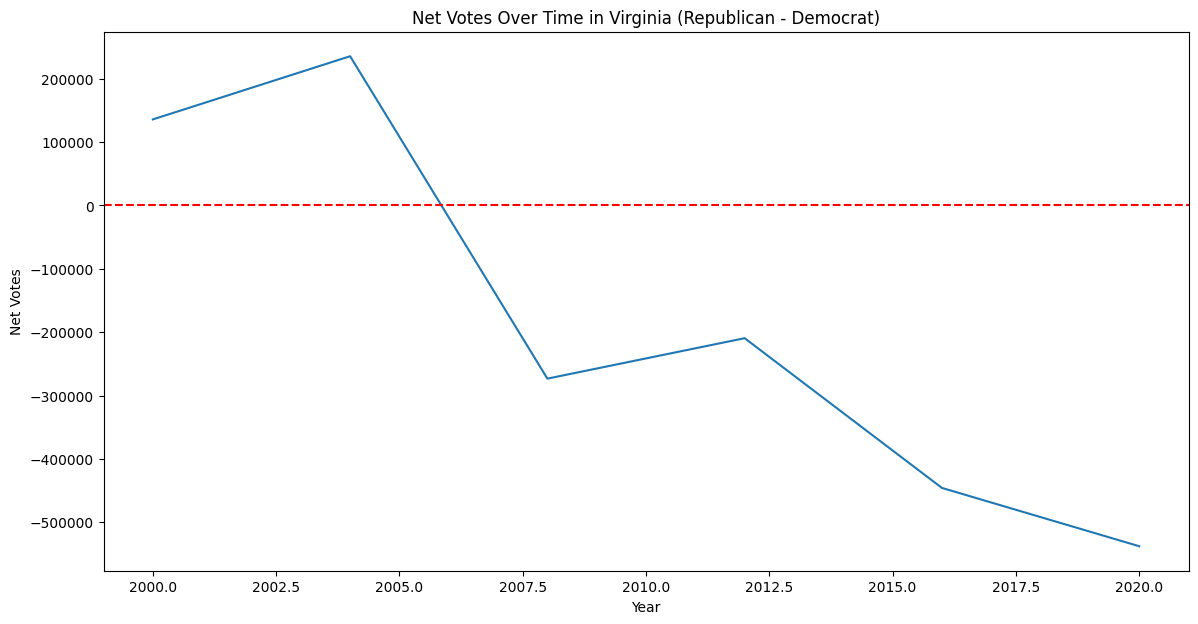

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate net votes
voting_va['net_votes'] = voting_va.apply(lambda x: x['candidatevotes'] if x['party'] == 'REPUBLICAN' else -x['candidatevotes'], axis=1)
net_votes_over_time = voting_va.groupby(['year', 'county_name'])['net_votes'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=net_votes_over_time, x='year', y='net_votes', estimator='sum', errorbar=None)
plt.title('Net Votes Over Time in Virginia (Republican - Democrat)')
plt.xlabel('Year')
plt.ylabel('Net Votes')
plt.axhline(0, color='red', linestyle='--')  # Zero line for reference
plt.show()




## Random Forest Regression Model

In [ ]:
# Split the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model using R^2 score
r2_score = model.score(X_test, y_test)
print(f"R^2 score for the model: {r2_score}")


R^2 score for the model: 0.5462298502822722


In [ ]:
# Prepare the 2024 data
X_2024 = pd.DataFrame(encoder.transform(combined_primary_agg[['county_name']]), columns=encoder.get_feature_names_out(['county_name']))
X_2024['year'] = 2024

# Predict using the model and transform predictions
predictions_2024_ihs = model.predict(X_2024)
predictions_2024 = np.sinh(predictions_2024_ihs)

# Sum the predictions to get the overall net vote counts
total_prediction_2024 = predictions_2024.sum()
print(f"Total Net Vote Prediction for 2024: {total_prediction_2024}")


Total Net Vote Prediction for 2024: 554996.9510196939


# **Support Vector Machine**

There still seems to be some `nan` values. The best approach is just to fill them with $0$.

It seems as if the best parameters are `C` = $100$, `gamma` = $1$, `kernel` = rbf, and $\epsilon = .02$.

Unfortunately, the $R^2$ value for the SVM is pretty decent with a value of $.74$. Perhaps trying different features or different hyperparameters may help yield a better score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/wangjalen7/project_voting/main/data/voting_VA.csv' # Create url to the chunk to be processed
voting_va = pd.read_csv(url) # Download this chunk of data
print(voting_va.head()) # Visually inspect the first few rows
print(voting_va.info())

   Unnamed: 0  year     state state_po county_name  county_fips        office  \
0       11161  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
1       11162  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
2       11163  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
3       11164  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
4       11165  2000  VIRGINIA       VA   ALBEMARLE        51003  US PRESIDENT   

        candidate       party  candidatevotes  totalvotes   version   mode  
0         AL GORE    DEMOCRAT            5092       11925  20220315  TOTAL  
1  GEORGE W. BUSH  REPUBLICAN            6352       11925  20220315  TOTAL  
2     RALPH NADER       GREEN             220       11925  20220315  TOTAL  
3           OTHER       OTHER             261       11925  20220315  TOTAL  
4         AL GORE    DEMOCRAT           16255       36846  20220315  TOTAL  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

In [ ]:
cleaned_voting_va = voting_va.drop(columns=['Unnamed: 0', 'state', 'state_po', 'office', 'version', 'mode'])
cleaned_voting_va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            3736 non-null   int64 
 1   county_name     3736 non-null   object
 2   county_fips     3736 non-null   int64 
 3   candidate       3736 non-null   object
 4   party           3736 non-null   object
 5   candidatevotes  3736 non-null   int64 
 6   totalvotes      3736 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 204.4+ KB


In [ ]:
cleaned_voting_va.isnull().sum()

year              0
county_name       0
county_fips       0
candidate         0
party             0
candidatevotes    0
totalvotes        0
dtype: int64

In [ ]:
cleaned_voting_va.head()

,year,county_name,county_fips,candidate,party,candidatevotes,totalvotes
0,2000,ACCOMACK,51001,AL GORE,DEMOCRAT,5092,11925
1,2000,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352,11925
2,2000,ACCOMACK,51001,RALPH NADER,GREEN,220,11925
3,2000,ACCOMACK,51001,OTHER,OTHER,261,11925
4,2000,ALBEMARLE,51003,AL GORE,DEMOCRAT,16255,36846


In [ ]:
cleaned_voting_va.describe()

,year,county_fips,candidatevotes,totalvotes
count,3736.000000,3736.000000,3736.000000,3736.000000
mean,2012.826552,51264.579229,5878.282120,29116.353587
std,7.589036,270.546458,18452.435802,58562.057257
min,2000.000000,51001.000000,0.000000,0.000000
25%,2004.000000,51069.000000,59.000000,6741.500000
50%,2016.000000,51139.000000,899.000000,11629.000000
75%,2020.000000,51550.000000,4548.250000,24520.750000
max,2020.000000,51840.000000,355133.000000,601243.000000


In [ ]:
cleaned_voting_va['party'].value_counts()

party
DEMOCRAT       1068
REPUBLICAN     1068
OTHER          1068
LIBERTARIAN     398
GREEN           134
Name: count, dtype: int64

In [ ]:
cleaned_voting_va['candidate'].value_counts()

candidate
OTHER                1068
JOSEPH R BIDEN JR     398
JO JORGENSEN          398
DONALD J TRUMP        398
GEORGE W. BUSH        268
BARACK OBAMA          268
AL GORE               134
RALPH NADER           134
JOHN KERRY            134
JOHN MCCAIN           134
MITT ROMNEY           134
HILLARY CLINTON       134
DONALD TRUMP          134
Name: count, dtype: int64

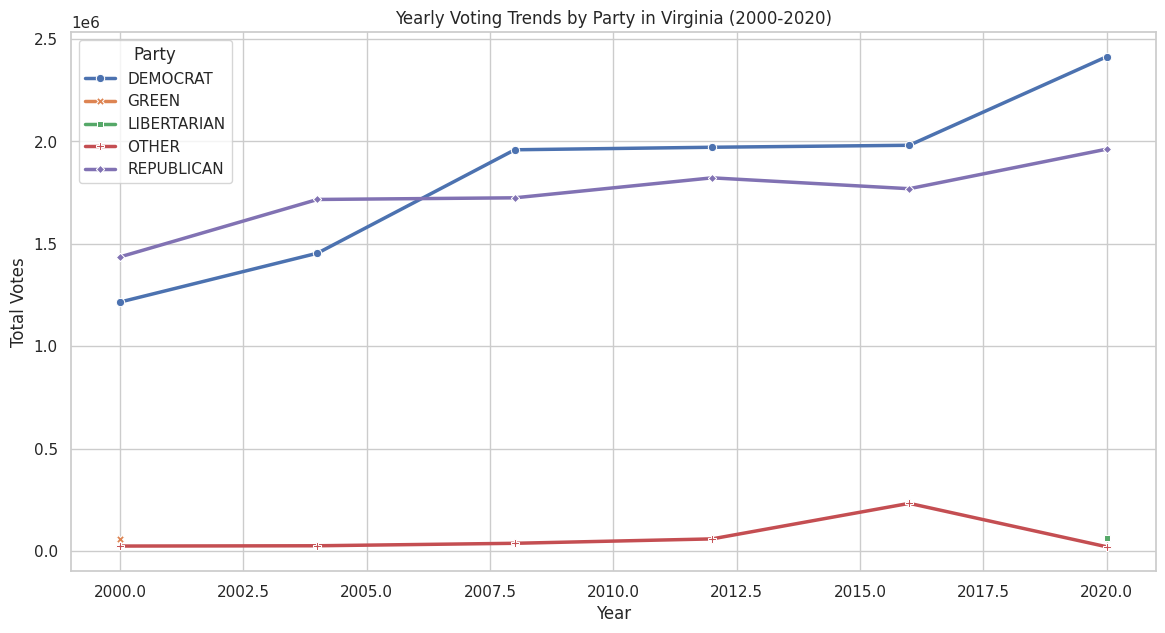

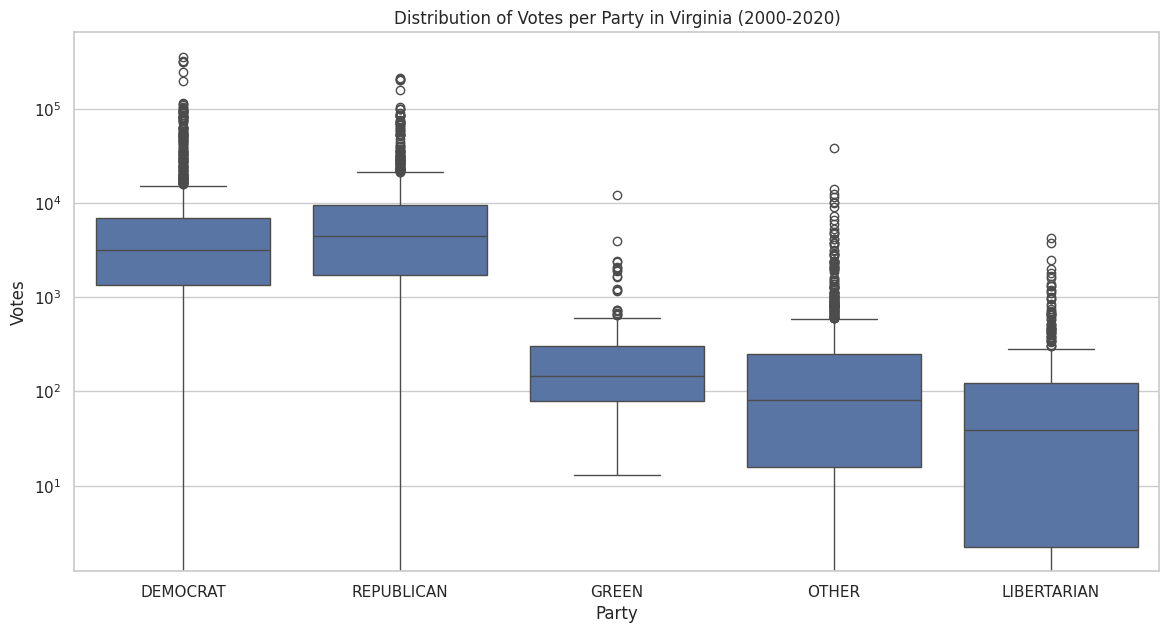

In [ ]:
# Setting plot style
sns.set(style="whitegrid")

# Aggregate data by year and party for total votes
yearly_trends = cleaned_voting_va.groupby(['year', 'party'])['candidatevotes'].sum().unstack()

# Line plot for yearly trends by party
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_trends, dashes=False, linewidth=2.5, markers=True)
plt.title('Yearly Voting Trends by Party in Virginia (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend(title='Party')
plt.show()

# Box plot for distribution of votes per party
plt.figure(figsize=(14, 7))
sns.boxplot(x='party', y='candidatevotes', data=cleaned_voting_va)
plt.title('Distribution of Votes per Party in Virginia (2000-2020)')
plt.xlabel('Party')
plt.ylabel('Votes')
plt.yscale('log')  # Using logarithmic scale due to large range of votes
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/wangjalen7/project_voting/main/data/2024%20March%20Democratic%20Primary%20Election%20Results.csv' # Create url to the chunk to be processed
dem = pd.read_csv(url) # Download this chunk of data
print(dem.head()) # Visually inspect the first few rows
print(dem.info())

  CandidateId         CandidateName  TOTAL_VOTES       Party  WriteInVote  \
0         cs3  Dean Benson Phillips            2  Democratic            0   
1         cs2  Joseph R. Biden, Jr.          110  Democratic            0   
2         cs1   Marianne Williamson            6  Democratic            0   
3         cs3  Dean Benson Phillips            1  Democratic            0   
4         cs2  Joseph R. Biden, Jr.           35  Democratic            0   

   LocalityCode     LocalityName PrecinctId        PrecinctName DistrictId  \
0             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   
1             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   
2             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   
3             1  ACCOMACK COUNTY       0201      201 - ATLANTIC        ed1   
4             1  ACCOMACK COUNTY       0201      201 - ATLANTIC        ed1   

  DistrictType              DistrictName OfficeId OfficeTitle  Elect

In [ ]:
columns_to_drop = ['ElectionId', 'NumberOfSeats', 'OfficeId', 'DistrictType', 'DistrictName', 'ElectionType', 'ElectionName']
dem_cleaned = dem.drop(columns=columns_to_drop)
dem_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8034 entries, 0 to 8033
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CandidateId    8034 non-null   object
 1   CandidateName  8034 non-null   object
 2   TOTAL_VOTES    8034 non-null   int64 
 3   Party          8034 non-null   object
 4   WriteInVote    8034 non-null   int64 
 5   LocalityCode   8034 non-null   int64 
 6   LocalityName   8034 non-null   object
 7   PrecinctId     8034 non-null   object
 8   PrecinctName   8034 non-null   object
 9   DistrictId     8034 non-null   object
 10  OfficeTitle    8034 non-null   object
 11  ElectionDate   8034 non-null   object
dtypes: int64(3), object(9)
memory usage: 753.3+ KB


In [ ]:
dem_cleaned.isnull().sum()

CandidateId      0
CandidateName    0
TOTAL_VOTES      0
Party            0
WriteInVote      0
LocalityCode     0
LocalityName     0
PrecinctId       0
PrecinctName     0
DistrictId       0
OfficeTitle      0
ElectionDate     0
dtype: int64

In [ ]:
dem_cleaned['Party'].value_counts()

Party
Democratic    8034
Name: count, dtype: int64

In [ ]:
url = 'https://raw.githubusercontent.com/wangjalen7/project_voting/main/data/2024%20March%20Republican%20Primary%20Election%20Results.csv' # Create url to the chunk to be processed
rep = pd.read_csv(url) # Download this chunk of data
print(rep.head()) # Visually inspect the first few rows
print(rep.info())

  CandidateId    CandidateName  TOTAL_VOTES       Party  WriteInVote  \
0         cs4   Chris Christie            1  Republican            0   
1         cs7  Donald J. Trump          330  Republican            0   
2         cs9   Nikki R. Haley           77  Republican            0   
3         cs8  Ron D. DeSantis            6  Republican            0   
4         cs5  Ryan L. Binkley            0  Republican            0   

   LocalityCode     LocalityName PrecinctId        PrecinctName DistrictId  \
0             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   
1             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   
2             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   
3             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   
4             1  ACCOMACK COUNTY       0101  101 - CHINCOTEAGUE        ed1   

  DistrictType              DistrictName OfficeId OfficeTitle  ElectionId  \
0        state  Unite

In [ ]:
rep_cleaned = rep.drop(columns=columns_to_drop)
rep_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16068 entries, 0 to 16067
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CandidateId    16068 non-null  object
 1   CandidateName  16068 non-null  object
 2   TOTAL_VOTES    16068 non-null  int64 
 3   Party          16068 non-null  object
 4   WriteInVote    16068 non-null  int64 
 5   LocalityCode   16068 non-null  int64 
 6   LocalityName   16068 non-null  object
 7   PrecinctId     16068 non-null  object
 8   PrecinctName   16068 non-null  object
 9   DistrictId     16068 non-null  object
 10  OfficeTitle    16068 non-null  object
 11  ElectionDate   16068 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


In [ ]:
rep_cleaned.isnull().sum()

CandidateId      0
CandidateName    0
TOTAL_VOTES      0
Party            0
WriteInVote      0
LocalityCode     0
LocalityName     0
PrecinctId       0
PrecinctName     0
DistrictId       0
OfficeTitle      0
ElectionDate     0
dtype: int64

In [ ]:
rep_cleaned['Party'].value_counts()

Party
Republican    16068
Name: count, dtype: int64

In [ ]:
url = 'https://raw.githubusercontent.com/wangjalen7/project_voting/main/data/county_adjacencies.csv' # Create url to the chunk to be processed
county_adj = pd.read_csv(url) # Download this chunk of data
print(county_adj.head()) # Visually inspect the first few rows
print(county_adj.info())

           County  Population2022   FIPS  District                   N1  \
0        Accomack           33191  51001         2       Northumberland   
1       Albemarle          114534  51003         5  CharlottesvilleCity   
2  AlexandriaCity          155525  51510         8              Fairfax   
3       Alleghany           14835  51005         6                Craig   
4          Amelia           13455  51007         5         PrinceEdward   

           N2         N3             N4           N5        N6      N7  \
0   Lancaster  Middlesex        Mathews  Northampton       NaN     NaN   
1      Nelson    Augusta     Rockingham       Greene    Orange  Louisa   
2   Arlington        NaN            NaN          NaN       NaN     NaN   
3        Bath  Botetourt  CovingtonCity   Rockbridge       NaN     NaN   
4  Cumberland   Powhatan   Chesterfield    Dinwiddie  Nottoway     NaN   

         N8          N9     N10  N11  N12  
0       NaN         NaN     NaN  NaN  NaN  
1  Fluvanna  Buc

In [ ]:
county_adj.isnull().sum()

County              0
Population2022      0
FIPS                0
District            0
N1                  0
N2                 14
N3                 29
N4                 34
N5                 50
N6                 74
N7                100
N8                116
N9                123
N10               129
N11               132
N12               132
dtype: int64

In [ ]:
county_adj['County'].value_counts()

County
Accomack            1
NewportNewsCity     1
PrinceEdward        1
Powhatan            1
PortsmouthCity      1
                   ..
FallsChurchCity     1
FairfaxCity         1
Fairfax             1
Essex               1
WilliamsburgCity    1
Name: count, Length: 133, dtype: int64

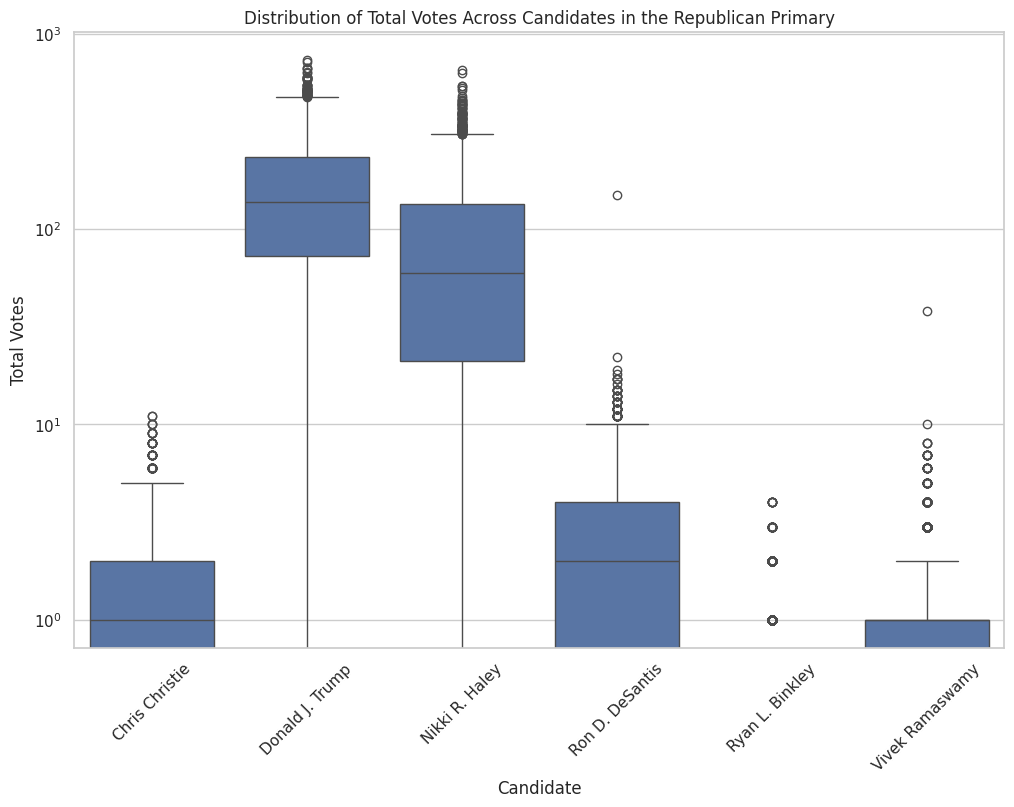

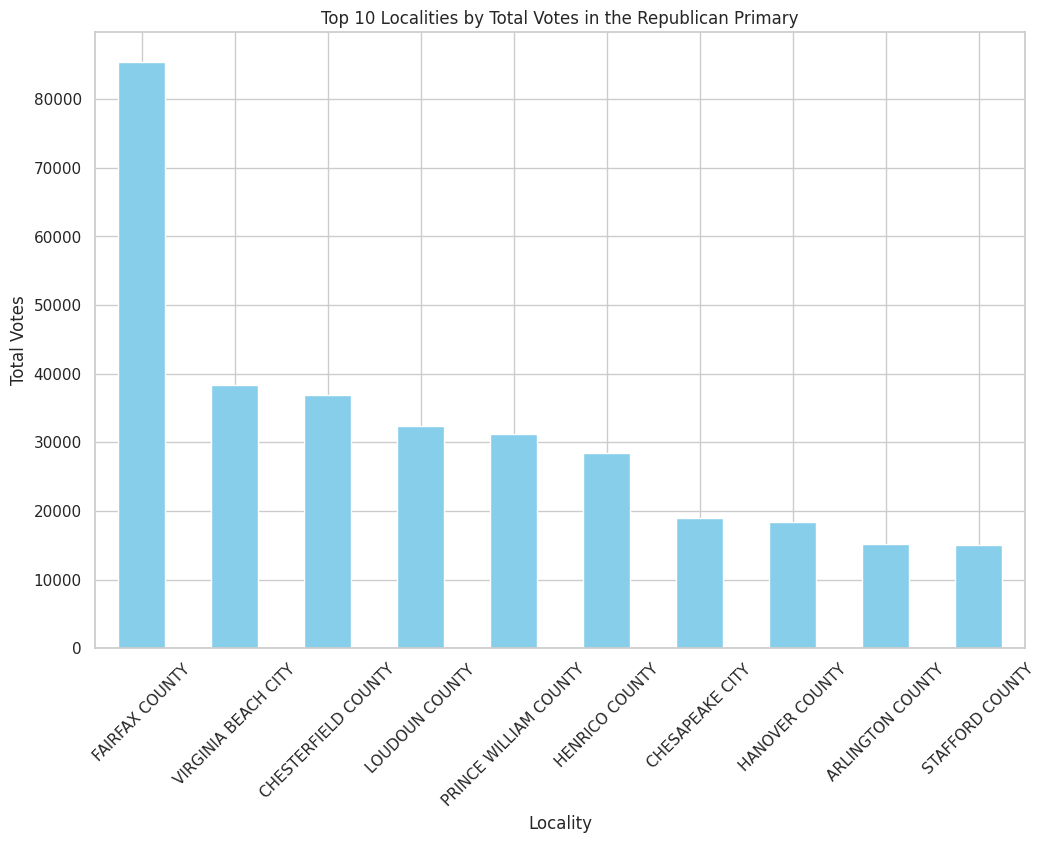

In [ ]:
# EDA for Republican Primary: Distribution of TOTAL_VOTES across candidates
plt.figure(figsize=(12, 8))
sns.boxplot(x='CandidateName', y='TOTAL_VOTES', data=rep_cleaned)
plt.title('Distribution of Total Votes Across Candidates in the Republican Primary')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.yscale('log')  # Using logarithmic scale due to large range of votes
plt.show()

# EDA for Republican Primary: Voting patterns across localities
total_votes_by_locality = rep_cleaned.groupby('LocalityName')['TOTAL_VOTES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
total_votes_by_locality.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Localities by Total Votes in the Republican Primary')
plt.xlabel('Locality')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

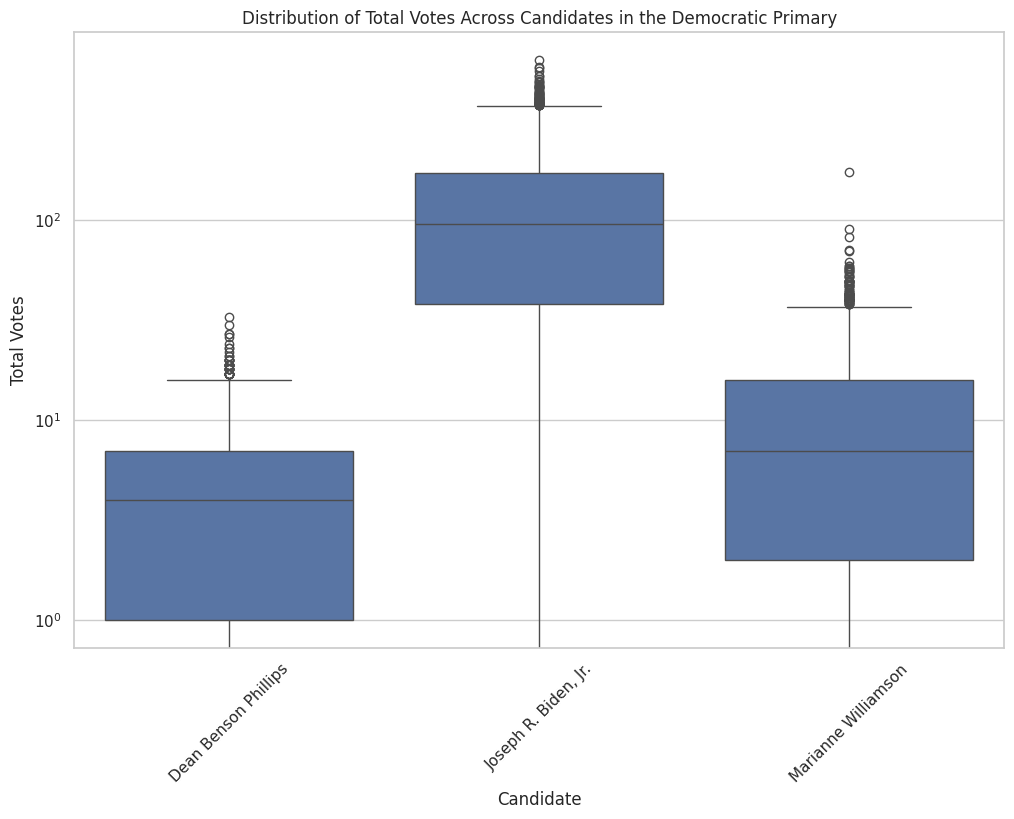

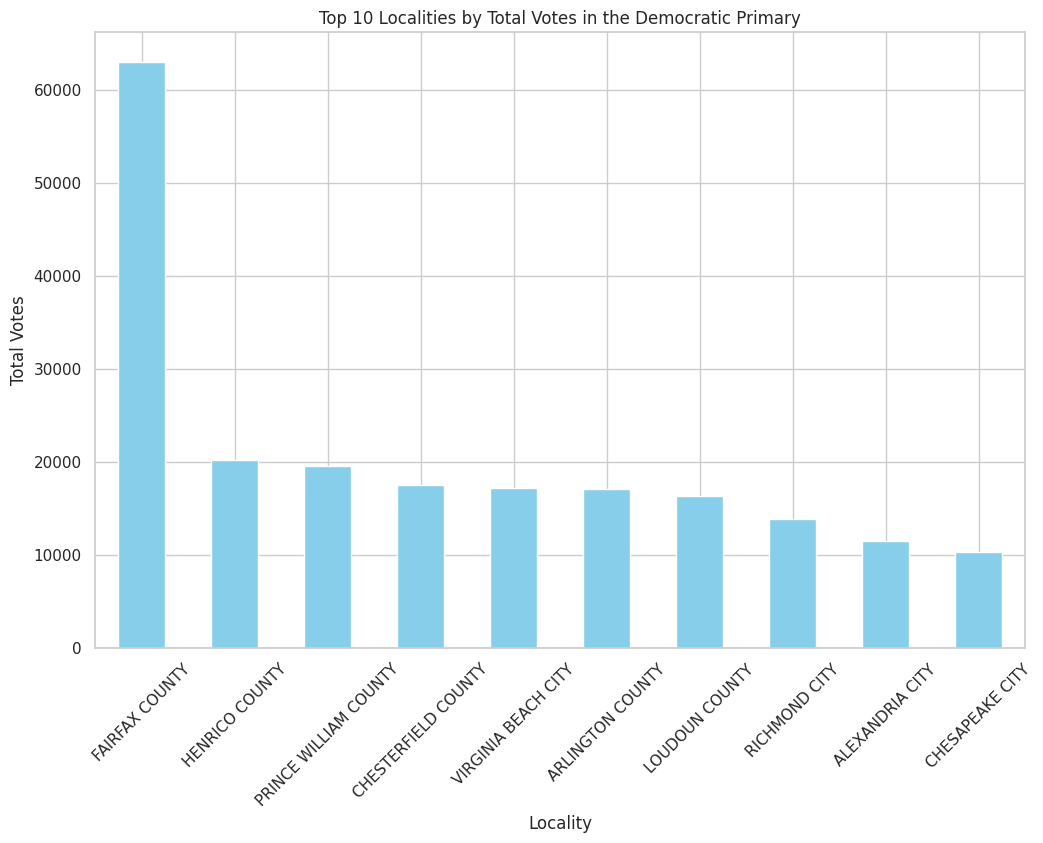

In [ ]:
# EDA for Democratic Primary: Distribution of TOTAL_VOTES across candidates
plt.figure(figsize=(12, 8))
sns.boxplot(x='CandidateName', y='TOTAL_VOTES', data=dem_cleaned)
plt.title('Distribution of Total Votes Across Candidates in the Democratic Primary')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.yscale('log')  # Using logarithmic scale due to large range of votes
plt.show()

# EDA for Democratic Primary: Voting patterns across localities
total_votes_by_locality_dem = dem_cleaned.groupby('LocalityName')['TOTAL_VOTES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
total_votes_by_locality_dem.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Localities by Total Votes in the Democratic Primary')
plt.xlabel('Locality')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()


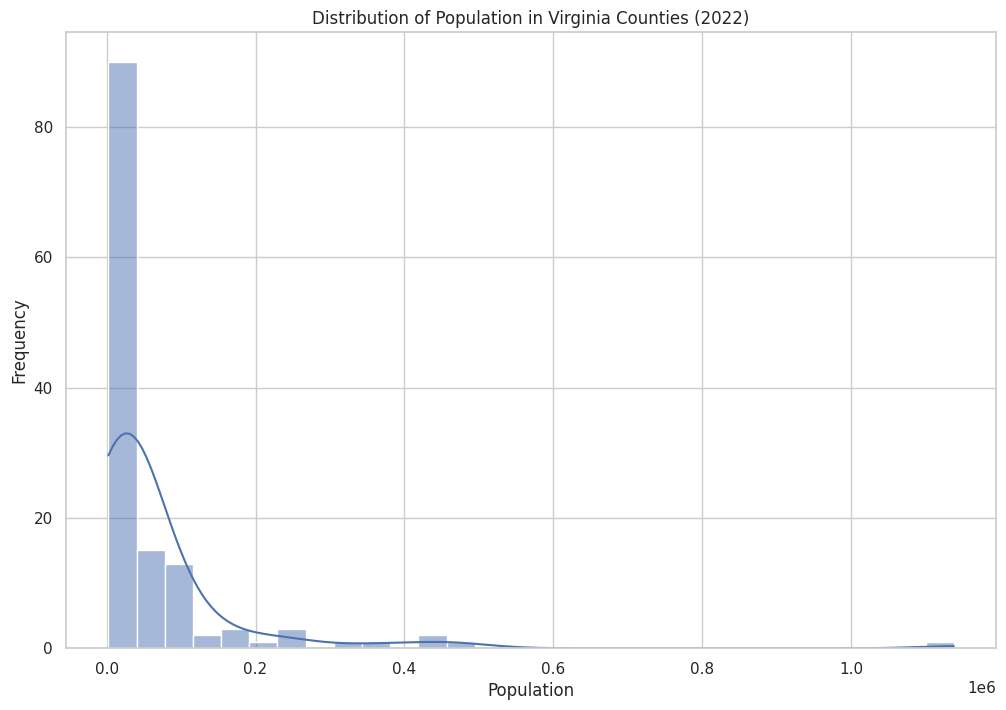

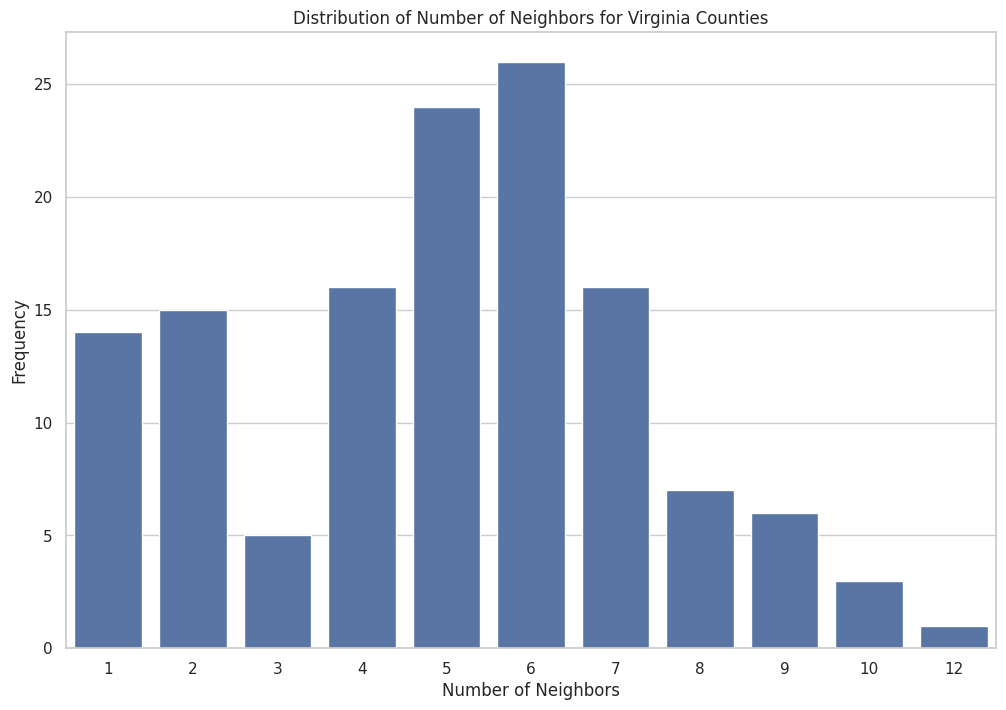

In [ ]:
# EDA for County Adjacencies: Distribution of Population2022
plt.figure(figsize=(12, 8))
sns.histplot(county_adj['Population2022'], bins=30, kde=True)
plt.title('Distribution of Population in Virginia Counties (2022)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

# EDA for County Adjacencies: Number of Neighbors
# Calculating the number of non-null neighbors for each county
neighbor_count = county_adj[[f'N{i}' for i in range(1, 13)]].notnull().sum(axis=1)
plt.figure(figsize=(12, 8))
sns.countplot(x=neighbor_count)
plt.title('Distribution of Number of Neighbors for Virginia Counties')
plt.xlabel('Number of Neighbors')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Filter to keep only Republican and Democrat votes for simplicity in calculating net vote count
voting_data_filtered = cleaned_voting_va[cleaned_voting_va['party'].isin(['REPUBLICAN', 'DEMOCRAT'])]

# Pivot table to reshape the data
pivot_data = voting_data_filtered.pivot_table(index=['year', 'county_name', 'county_fips', 'totalvotes'],
                                              columns='party', values='candidatevotes', aggfunc='sum').reset_index()

# Calculate net vote count (Republican - Democrat)
pivot_data['net_vote_count'] = pivot_data['REPUBLICAN'] - pivot_data['DEMOCRAT']

# Standardize column names in primary data
dem_cleaned.rename(columns={'LocalityName': 'county_name', 'TOTAL_VOTES': 'total_votes'}, inplace=True)
rep_cleaned.rename(columns={'LocalityName': 'county_name', 'TOTAL_VOTES': 'total_votes'}, inplace=True)

# Combine the primary results into one dataset
combined_primary = pd.concat([dem_cleaned, rep_cleaned])

# Aggregate votes by county and party for the primary data
combined_primary_agg = combined_primary.groupby(['county_name', 'Party'])['total_votes'].sum().unstack().reset_index()
combined_primary_agg.fillna(0, inplace=True)  # Fill missing values with zero
combined_primary_agg['net_votes'] = combined_primary_agg['Republican'] - combined_primary_agg['Democratic']
combined_primary_agg['year'] = 2024  # Add the election year

# Aggregate votes by county and year for the general election data
cleaned_voting_va['net_votes'] = np.where(cleaned_voting_va['party'] == 'REPUBLICAN', cleaned_voting_va['candidatevotes'], -cleaned_voting_va['candidatevotes'])
voting_va_agg = cleaned_voting_va.groupby(['year', 'county_name']).agg({'net_votes': 'sum'}).reset_index()

# Apply the inverse hyperbolic sine transformation to net votes
voting_va_agg['net_votes_ihs'] = np.arcsinh(voting_va_agg['net_votes'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for modeling
# Using the aggregated general election data for training the linear regression model
X = voting_va_agg[['year', 'county_name']]  # Predictor variables
y = voting_va_agg['net_votes_ihs']  # Target variable

# Encoding categorical data - county names
X_encoded = pd.get_dummies(X, columns=['county_name'])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model performance
mse, r2


(1.2137520196503883e+24, -1.734659045924393e+22)

In [ ]:
from sklearn.decomposition import PCA

# Standardizing the data (mean = 0 and variance = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Applying PCA
pca = PCA(n_components=10)  # we start with 10 components to see how much variance it explains
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

explained_variance, cumulative_explained_variance


(array([0.00778825, 0.0059957 , 0.00599516, 0.00599423, 0.00599408,
        0.00599334, 0.00599266, 0.00599196, 0.00599105, 0.00599058]),
 array([0.00778825, 0.01378396, 0.01977912, 0.02577334, 0.03176742,
        0.03776076, 0.04375342, 0.04974538, 0.05573644, 0.06172701]))

In [ ]:
# Increase number of PCA
pca = PCA(n_components=50)  # Trying with 50 components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Re-running the linear regression model with the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model with PCA data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict on the test set with PCA data
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate performance metrics with PCA data
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

explained_variance, cumulative_explained_variance, mse_pca, r2_pca


(array([0.00778964, 0.00599855, 0.00599846, 0.00599835, 0.00599829,
        0.00599815, 0.00599808, 0.00599803, 0.00599794, 0.00599774,
        0.00599768, 0.00599745, 0.00599725, 0.00599708, 0.00599699,
        0.00599675, 0.00599639, 0.00599606, 0.00599595, 0.00599585,
        0.00599501, 0.00599492, 0.00599475, 0.00599429, 0.00599404,
        0.00599327, 0.00599307, 0.00599279, 0.00599196, 0.00599176,
        0.00599114, 0.00599098, 0.00599053, 0.0059899 , 0.00598906,
        0.00598841, 0.00598826, 0.00598754, 0.00598597, 0.00598536,
        0.00598487, 0.00598371, 0.00598332, 0.00598308, 0.00598226,
        0.00598109, 0.00598028, 0.00597962, 0.00597936, 0.005978  ]),
 array([0.00778964, 0.01378819, 0.01978665, 0.025785  , 0.03178329,
        0.03778144, 0.04377952, 0.04977755, 0.05577549, 0.06177324,
        0.06777092, 0.07376837, 0.07976562, 0.0857627 , 0.09175969,
        0.09775644, 0.10375283, 0.10974889, 0.11574484, 0.12174069,
        0.1277357 , 0.13373062, 0.13972537, 0.